## Import dependances

In [1]:
import phoebe as phb, numpy as np

## Generate Binary

In [2]:
bSystem = phb.default_binary()
bSystem['period@binary@component'] = 10
print(bSystem['incl'])

ParameterSet: 5 parameters
C          incl@primary@component: 90.0 deg
C        incl@secondary@component: 90.0 deg
            incl@binary@component: 90.0 deg
          incl@primary@constraint: {incl@binary@component} + {pitch@primary@component}
        incl@secondary@constraint: {incl@binary@component} + {pitch@secondary@component}


In [3]:
bSystem.add_dataset(
    'lc',
    compute_phases = phb.linspace(0, 1, 100),
    dataset = 'lc01'
)

<ParameterSet: 80 parameters | contexts: dataset, constraint, compute, figure>

In [4]:
bSystem['incl@orbit'] = 90
bSystem.run_compute(model='incl_90')

bSystem['incl@orbit'] = 85
bSystem.run_compute(model='incl_85') 

bSystem['incl@orbit'] = 80
bSystem.run_compute(model='incl_80') 

100%|██████████| 100/100 [00:05<00:00, 17.96it/s]


<ParameterSet: 3 parameters | qualifiers: times, fluxes, comments>

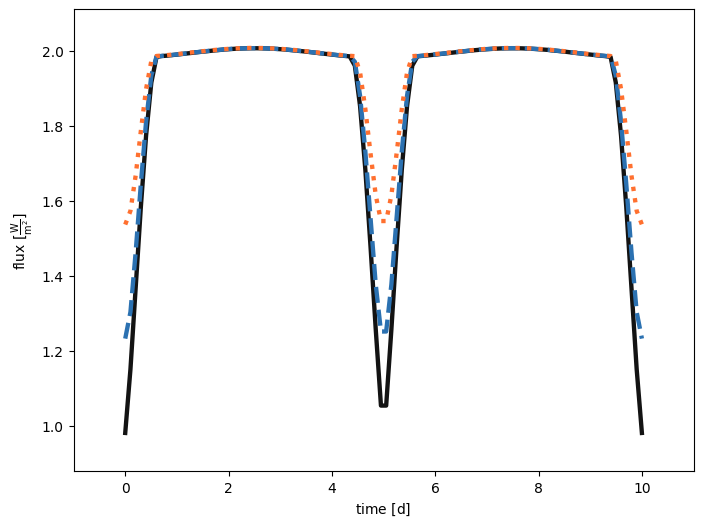

In [5]:
afig, mpltfig = bSystem.plot(show=True)

In [1]:
import sys
sys.path.append('../')

In [9]:
bSystem.models

['latest', 'incl_90', 'incl_85', 'incl_80']

In [12]:
bSystem['incl_90@model']

<ParameterSet: 3 parameters | qualifiers: fluxes, times, comments>

In [2]:
from Functions.phoebeCustom import saveSimulation
saveSimulation(bSystem=bSystem, filename='test')

/home/noah/miniconda3/envs/mPhysPrj/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


NameError: name 'bSystem' is not defined